# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
final_df = pd.read_csv('../data/final_df.csv',index_col = 0)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
final_df.head()

,Season,Week_Number,Week_Name,Baker,Gender,Age,Signature_Handshake,Technical_Rank,Showstopper_Handshake,Favorite,Least_Favorite,Star_Baker,Eliminated,Winner,signature,showstopper
0,2,1,Cake,Ben,M,31,0,2,0,0.0,0,0,0,0,Rhubarb and Custard CupcakesAfter Dinner Cupcakes,Vanilla Sponge with White Chocolate and Raspbe...
1,2,1,Cake,Holly,F,31,0,1,0,0.0,0,1,0,0,Cherry Bakewell Inspired CupcakesGinger Cupcak...,Novelty Farm Cake
2,2,1,Cake,Ian,M,40,0,10,0,0.0,0,0,0,0,Apple and Cinnamon Cupcakes,Unknown
3,2,1,Cake,Janet,F,63,0,8,0,0.0,0,0,0,0,Raspberry and Cream Cupcakes,Chocolate Marble Cakewith Dark and White Choco...
4,2,1,Cake,Jason,M,19,0,6,0,0.0,0,0,0,0,Lemon Meringue CupcakesApple and Cinnamon Cupc...,Unknown


### Visualizing the Importance of Handshakes

<Figure size 640x480 with 0 Axes>

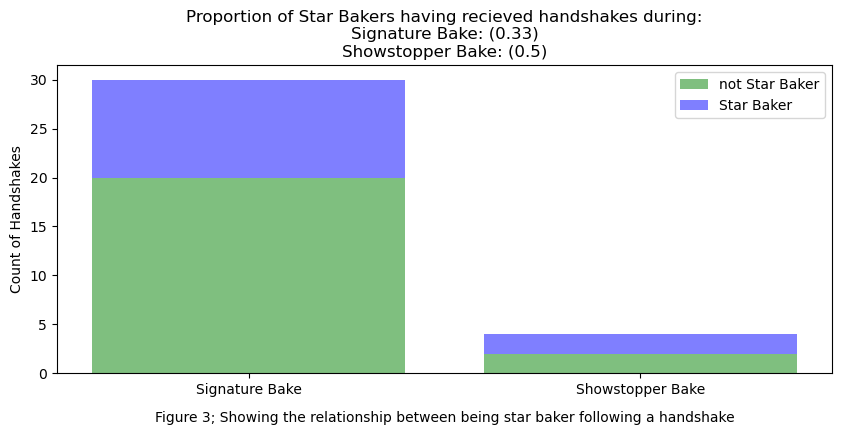

In [5]:
#Visualizing handshakes and star baker recipients on both signature bakes and showstoppers
plt.clf()

fig, ax = plt.subplots(figsize=(10,4))

numsig =final_df.Signature_Handshake.sum()
starsig = final_df.loc[final_df.Star_Baker==1]['Signature_Handshake'].sum()
numshow = final_df.Showstopper_Handshake.sum()
starshow =final_df.loc[final_df.Star_Baker==1]['Showstopper_Handshake'].sum()

x= ['Signature Bake','Showstopper Bake']
y1= [numsig-starsig, numshow - starshow]
y2 = [starsig,starshow]
plt.bar(x,y1,color='green',alpha=.5)
plt.bar(x,y2,bottom = y1,color='blue',alpha=.5)
plt.legend(['not Star Baker','Star Baker'])
plt.title('Proportion of Star Bakers having recieved handshakes during:\n' +
          'Signature Bake: (' + str(round(starsig/numsig,2)) + ')'
          '\nShowstopper Bake: ' + '(' +str(starshow/numshow) + ')')
plt.ylabel('Count of Handshakes')
txt = 'Figure 3; Showing the relationship between being star baker following a handshake'
plt.text(.5, -5, txt, ha='center')
plt.show()      

### Has anyone who recieved a handshake been eliminated that week?

In [6]:
final_df.loc[((final_df.Signature_Handshake ==1) | (final_df.Showstopper_Handshake ==1)) & final_df.Eliminated==1]

,Season,Week_Number,Week_Name,Baker,Gender,Age,Signature_Handshake,Technical_Rank,Showstopper_Handshake,Favorite,Least_Favorite,Star_Baker,Eliminated,Winner,signature,showstopper
176,3,7,Sweet Dough,Ryan,M,38,1,6,0,0.0,0,0,1,0,Lardy Cakes,Char Siu Bao
697,7,10,Final,Jane,F,61,1,3,0,0.0,0,0,1,0,"Red, White and Blue Meringue Crown",Family Favourites Feast


### Visualizing Age's impact

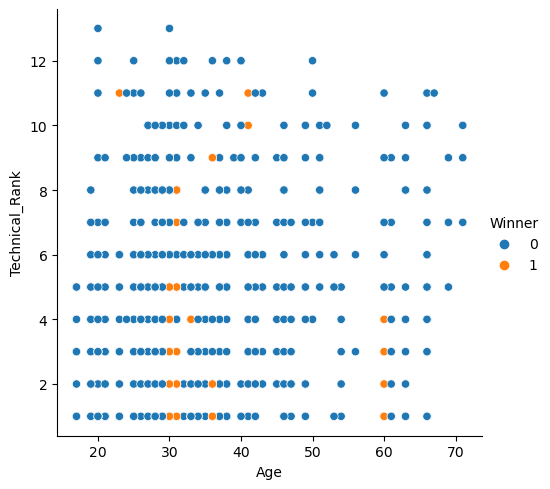

In [7]:
#Any relationship between Age and Technical_Rank?
sns.relplot(kind='scatter',data=final_df, x='Age',y='Technical_Rank',hue= 'Winner')
plt.show()

In [8]:
X = final_df.groupby(['Baker','Season','Star_Baker','Age'],as_index = False)['Baker'].value_counts()
X

,Baker,Season,Star_Baker,Age,count
0,Ali,4,0,25,4
1,Alice,10,0,29,8
2,Alice,10,1,29,2
3,Alvin,6,0,37,6
4,Amelia,10,0,24,3
...,...,...,...,...,...
154,Victoria,3,0,50,2
155,Victoria,3,1,50,1
156,Yan,8,0,46,7
157,Yasmin,2,0,43,5


<Figure size 640x480 with 0 Axes>

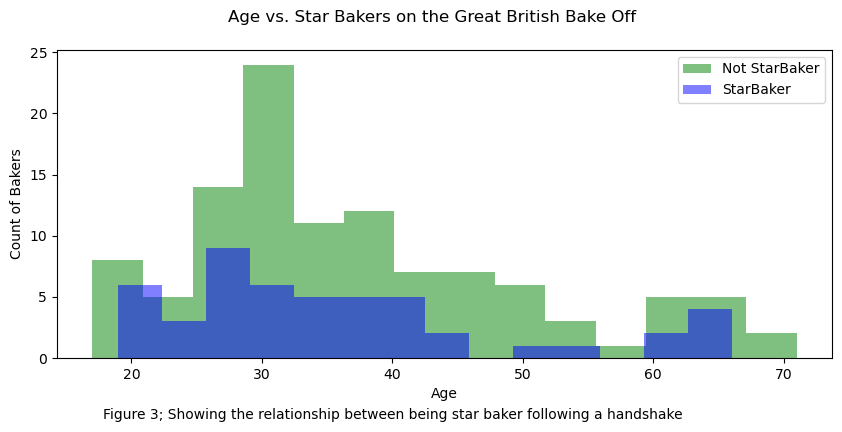

In [9]:
#Any relationship between Age and Star_Baker?
plt.clf()
fig, ax = plt.subplots(figsize=(10,4))
X = final_df.groupby(['Baker','Season','Star_Baker','Age'],as_index = False)['Baker'].value_counts()


ax.hist(X[X["Star_Baker"]==0]["Age"],bins=14, alpha=.5, color="green", label="Not StarBaker")
ax.hist(X[X["Star_Baker"]==1]["Age"],bins=14, alpha=0.5, color="blue", label="StarBaker")
ax.set_xlabel("Age")
ax.set_ylabel("Count of Bakers")

fig.suptitle("Age vs. Star Bakers on the Great British Bake Off")

ax.legend()

plt.text(40, -5, txt, ha='center')
txt = 'Figure 2; A breakdown of Age on the show'

plt.show()

In [10]:
X= X[['Age','Star_Baker']].sort_values('Age').drop_duplicates()

X[(X.Age> 20) & (X.Age < 30)]
#X[X.groupby('Age')['Age'].transform('count') <2]


,Age,Star_Baker
69,21,1
68,21,0
11,23,1
64,23,0
4,24,0
120,25,0
6,25,1
143,26,0
149,26,1
89,27,0


### Visualizing Gender's effect

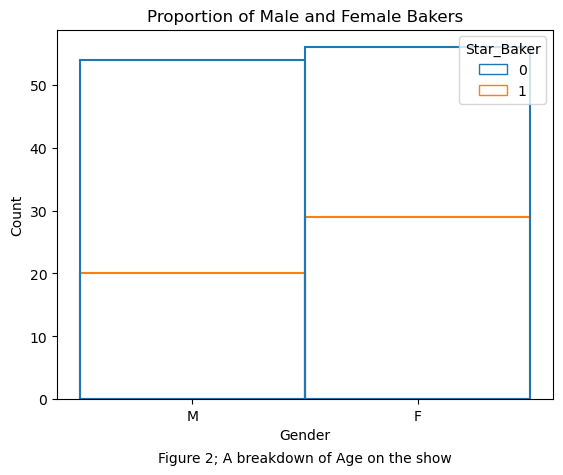

In [11]:
#Any visual discrepancies between gender and star baker?
X = final_df.groupby(['Baker','Season','Star_Baker'],as_index = False)['Gender'].value_counts()
_=sns.histplot(data=X,x='Gender',hue = "Star_Baker",fill=False)
plt.title('Proportion of Male and Female Bakers')
plt.text(.5, -10, txt, ha='center')
txt= 'Figure 1; A breakdown of gender counts in the show' 

In [12]:
final_df.groupby(['Star_Baker','Gender'])['Gender'].count()

Star_Baker  Gender
0           F         321
            M         258
1           F          51
            M          37
Name: Gender, dtype: int64

In [13]:
final_df.groupby('Gender')['Gender'].count()

Gender
F    372
M    295
Name: Gender, dtype: int64

In [14]:
372-295

77

Text(-1, -20, 'Figure 4; Handshakes following Signature and Showstopper Bakes')

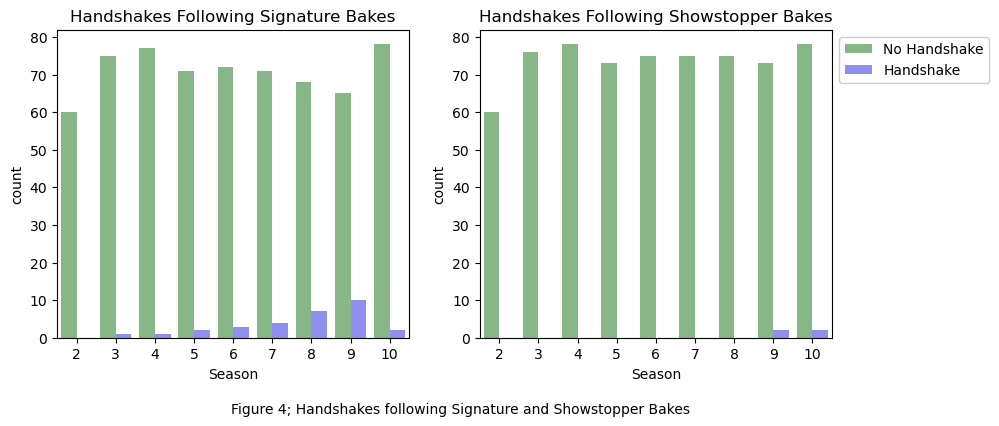

In [15]:
#Did signature handshakes increase during any season?

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.countplot(x="Season", hue="Signature_Handshake", data=final_df, palette={1:"blue", 0:"green"}, ax=axs[0],alpha=.5)
#g.set_xticklabels(rotation=35)
axs[0].set_title('Handshakes Following Signature Bakes')
axs[0].legend().remove()

#Did Showstopper handshakes increase during any season?
sns.countplot(x="Season", hue="Showstopper_Handshake", data=final_df,palette={1:"blue", 0:"green"}, ax=axs[1],alpha=.5)
axs[1].set_title('Handshakes Following Showstopper Bakes')
axs[1].legend(['No Handshake','Handshake'],bbox_to_anchor=(1,1),facecolor='white', framealpha=1)

txt='Figure 4; Handshakes following Signature and Showstopper Bakes'
plt.text(-1, -20, txt, ha='center')
#g.set_xticklabels(rotation=35)


Seems like Paul didn't like giving out handshakes for showstoppers until later in the season

### Correlation between datapoints

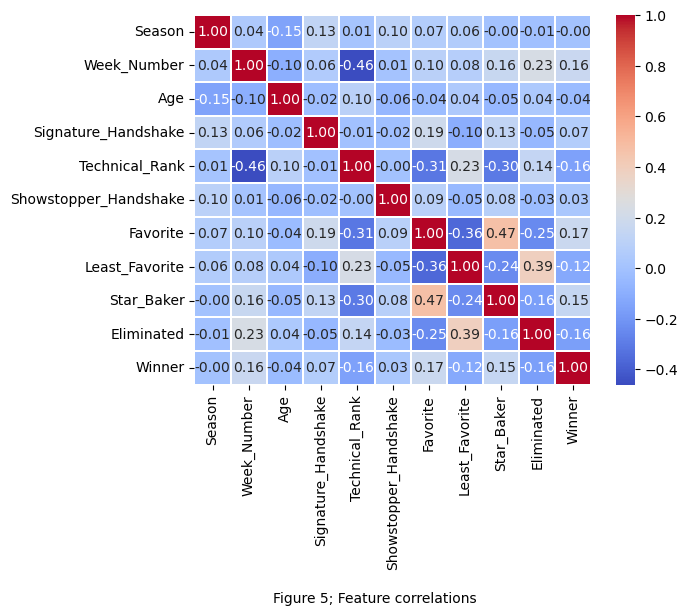

In [16]:
#Lets look for correlations between all the catagories
sns.heatmap(final_df.corr(),annot=True,cmap="coolwarm",fmt='.2f',linewidths=.05)
txt='Figure 5; Feature correlations'
plt.text(5,17.5, txt, ha='center')
plt.show()

There is a correlation between favorite and star baker as well as least favorite and elimination

### Correlation between the # of star_baker awards and winning

In [17]:
#Create a table that shows the number of bakers that acquired star baker awards, grouped by season and star baker
Star_Baker_Winner_df = pd.DataFrame(final_df.groupby(['Season','Baker','Winner'])['Star_Baker']\
                                    .sum()).sort_values(['Winner','Star_Baker'],ascending=[False,False]).reset_index()

SB_plot = Star_Baker_Winner_df.groupby(['Star_Baker','Season']).agg({'Winner':'sum',
                                                          'Baker':'count'})
SB_plot.reset_index(inplace=True)
SB_plot[['Season','Star_Baker','Baker','Winner']].sort_values(['Season','Star_Baker']).head()

,Season,Star_Baker,Baker,Winner
0,2,0,7,0
9,2,1,2,0
18,2,2,3,1
1,3,0,6,0
10,3,1,3,0


In [18]:
#create a table that shows the winning number of star bakers that the winner of each season accumulated
winner_df = SB_plot.loc[SB_plot.Winner==1][['Season','Star_Baker']].sort_values('Season')
winner_df

,Season,Star_Baker
18,2,2
19,3,2
20,4,2
21,5,2
30,6,4
31,7,4
28,8,3
29,9,3
17,10,1


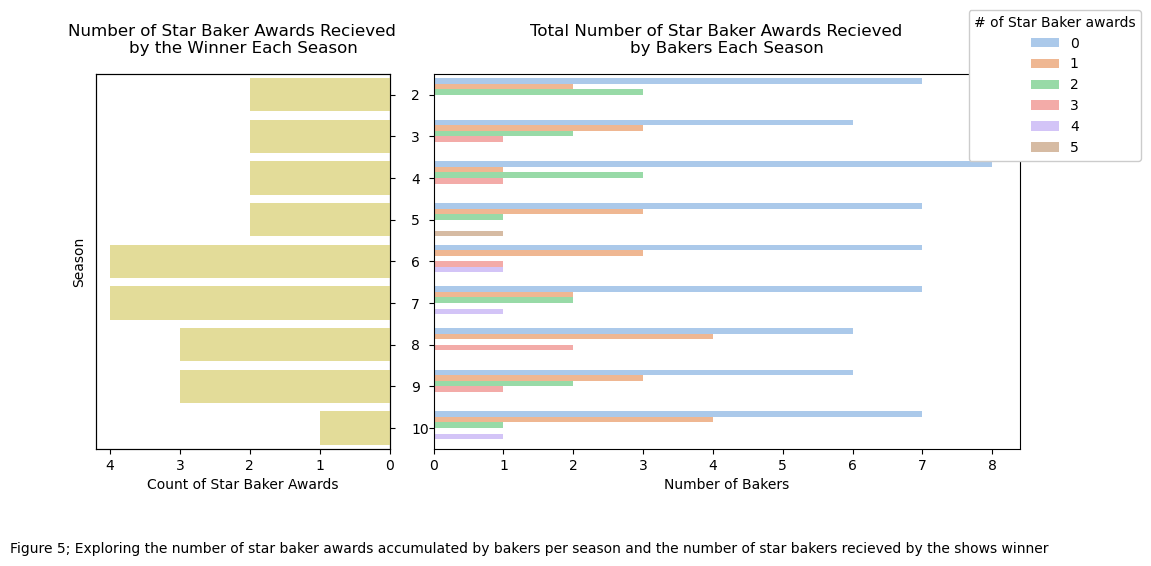

In [19]:
#plot the above tables in a mirrored horizontal bar chart
plt.clf
fig, ax = plt.subplots(figsize=(12,5), ncols=2, gridspec_kw={'width_ratios': [1, 2]})

ax[0].invert_xaxis() 

ax1=ax[0].twinx()


p1=sns.barplot(data=winner_df,y='Season',x='Star_Baker', ax=ax1, orient='h',color='khaki')
p1.set_title('Number of Star Baker Awards Recieved\
    \nby the Winner Each Season', fontsize=12, pad=15)
p2=sns.barplot(data=SB_plot,y='Season',x='Baker',hue ='Star_Baker', orient = 'h', ax=ax[1],palette='pastel')
p2.set_title('Total Number of Star Baker Awards Recieved\
    \nby Bakers Each Season',fontsize=12, pad=15)

#far left axis
ax[0].set(yticklabels=[])
ax[0].set(yticks=[])
ax[0].set(ylabel='Season')


#middle left axis
p1.set(ylabel=None)
p1.tick_params(which='major', pad=12)

#middle right axis
p2.set(ylabel=None)
p2.set(yticklabels=[])


#bottom left x axis
ax[0].set_xlabel('Count of Star Baker Awards')

#bottom right x axis
ax[1].set_xlabel('Number of Bakers')

plt.subplots_adjust(wspace=.1, top=0.85, bottom=0.1, left=0.18, right=0.95)

p2.legend(title='# of Star Baker awards',bbox_to_anchor=(.9,.75),facecolor='white', framealpha=1)

txt='Figure 5; Exploring the number of star baker awards accumulated by bakers per season and the number of star bakers recieved by the shows winner'

plt.text(-2,11,txt,ha='center')
plt.show()

In [20]:
Star_Baker_Winner_df.corr()

,Season,Winner,Star_Baker
Season,1.000000,-0.002093,0.020057
Winner,-0.002093,1.000000,0.468557
Star_Baker,0.020057,0.468557,1.000000
